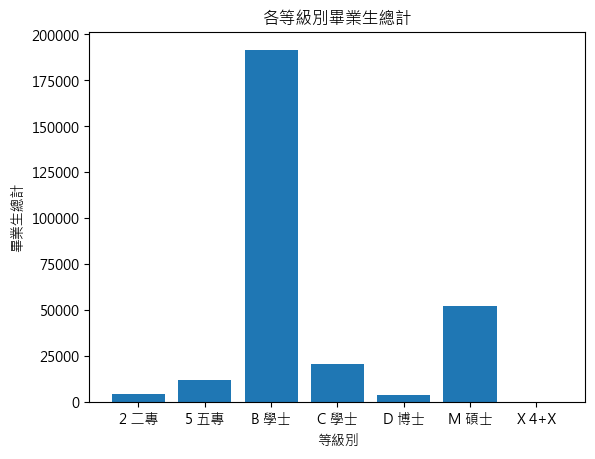

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", family="Microsoft JhengHei")


# 讀取csv檔案
data = pd.read_csv("graduatesc.csv")

# Q1: 各細學類系所數量表
# category_counts = data["細學類名稱"].value_counts()
# category_counts_df = pd.DataFrame(
#     {"細學類名稱": category_counts.index, "系所數量": category_counts.values}
# )
# category_counts_df = category_counts_df.sort_values(by="系所數量", ascending=False)

# print(category_counts_df.to_string(index=False))
# category_counts_df.to_csv("output/各細學類系所數量表.csv", index=False, encoding="big5")

# 以0填補缺失值，轉換帶有逗號的數字，並轉換數值形態
data = data.replace(" -", 0)
data["上學年畢業生男"] = data["上學年畢業生男"].str.replace(",", "").fillna(0).astype(int)
data["上學年畢業生女"] = data["上學年畢業生女"].str.replace(",", "").fillna(0).astype(int)

data["畢業生總計"] = data["上學年畢業生男"] + data["上學年畢業生女"]

total_graduates_by_level = data.groupby("等級別")["畢業生總計"].sum().reset_index()

plt.bar(total_graduates_by_level["等級別"], total_graduates_by_level["畢業生總計"])
plt.title("各等級別畢業生總計")
plt.xlabel("等級別")
plt.ylabel("畢業生總計")

plt.savefig("output/各等級別畢業生總計.png")
plt.show()
